In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
news_data = pd.read_csv('Data News Sources.csv')
news_data.head()


,Unnamed: 0,date,sentiment,text,source_country,queried_country,url,Safety Index
0,0,2019-06-12 18:48:59,-0.308,It’s time we start talking about climate chang...,mx,Russia,https://www.amnesty.org/en/latest/news/2019/06...,0.585000
1,1,2019-07-12 17:14:00,-0.108,"Even now, as more frequent ""king tides"" bubble...",us,China,https://edition.cnn.com/2019/07/11/us/miami-li...,0.784286
2,2,2019-10-23 15:32:04,0.292,The second meeting of the Board of senior memb...,uz,Russia,http://www.uzreport.com/sco-interbank-associat...,0.585000
3,3,2019-10-23 15:34:13,0.398,The Shanghai Cooperation Organization establis...,uz,Russia,http://www.uzreport.com/entrepreneur-committee...,0.585000
4,4,2019-10-23 15:37:39,0.146,All participants of the exhibition “Tea and Co...,uz,Russia,http://www.uzreport.com/over-7000-people-visit...,0.585000


In [24]:
news_data['word_count'] = news_data['text'].apply(lambda x: len(x.split()))
news_data.head()

,Unnamed: 0,date,sentiment,text,source_country,queried_country,url,Safety Index,word_count
0,0,2019-06-12 18:48:59,-0.308,It’s time we start talking about climate chang...,mx,Russia,https://www.amnesty.org/en/latest/news/2019/06...,0.585000,934
1,1,2019-07-12 17:14:00,-0.108,"Even now, as more frequent ""king tides"" bubble...",us,China,https://edition.cnn.com/2019/07/11/us/miami-li...,0.784286,1014
2,2,2019-10-23 15:32:04,0.292,The second meeting of the Board of senior memb...,uz,Russia,http://www.uzreport.com/sco-interbank-associat...,0.585000,560
3,3,2019-10-23 15:34:13,0.398,The Shanghai Cooperation Organization establis...,uz,Russia,http://www.uzreport.com/entrepreneur-committee...,0.585000,912
4,4,2019-10-23 15:37:39,0.146,All participants of the exhibition “Tea and Co...,uz,Russia,http://www.uzreport.com/over-7000-people-visit...,0.585000,404


In [25]:
news_data['date'] = pd.to_datetime(news_data['date'])

news_data['hour_of_day'] = news_data['date'].dt.hour
news_data['month'] = news_data['date'].dt.month

news_data.head()

,Unnamed: 0,date,sentiment,text,source_country,queried_country,url,Safety Index,word_count,hour_of_day,month
0,0,2019-06-12 18:48:59,-0.308,It’s time we start talking about climate chang...,mx,Russia,https://www.amnesty.org/en/latest/news/2019/06...,0.585000,934,18,6
1,1,2019-07-12 17:14:00,-0.108,"Even now, as more frequent ""king tides"" bubble...",us,China,https://edition.cnn.com/2019/07/11/us/miami-li...,0.784286,1014,17,7
2,2,2019-10-23 15:32:04,0.292,The second meeting of the Board of senior memb...,uz,Russia,http://www.uzreport.com/sco-interbank-associat...,0.585000,560,15,10
3,3,2019-10-23 15:34:13,0.398,The Shanghai Cooperation Organization establis...,uz,Russia,http://www.uzreport.com/entrepreneur-committee...,0.585000,912,15,10
4,4,2019-10-23 15:37:39,0.146,All participants of the exhibition “Tea and Co...,uz,Russia,http://www.uzreport.com/over-7000-people-visit...,0.585000,404,15,10


In [26]:
news_data['source_to_queried_count'] = news_data.groupby(['source_country', 'queried_country'])['queried_country'].transform('count')
news_data.head()

news_data.to_csv('news_data.csv')

# linear regression

we want to predict sentiment

to do this, we will use:

- word count of the article
- hour of the day
- month
- safety index

the user will input:

   - a piece of text (we find the word count)
   - the date that the article was published
   - the name of the country
    
    
on the page: have actual sentiment of the article.


# LETS BEGIN


In [27]:
news_data

,Unnamed: 0,date,sentiment,text,source_country,queried_country,url,Safety Index,word_count,hour_of_day,month,source_to_queried_count
0,0,2019-06-12 18:48:59,-0.308,It’s time we start talking about climate chang...,mx,Russia,https://www.amnesty.org/en/latest/news/2019/06...,0.585000,934,18,6,1.0
1,1,2019-07-12 17:14:00,-0.108,"Even now, as more frequent ""king tides"" bubble...",us,China,https://edition.cnn.com/2019/07/11/us/miami-li...,0.784286,1014,17,7,42.0
2,2,2019-10-23 15:32:04,0.292,The second meeting of the Board of senior memb...,uz,Russia,http://www.uzreport.com/sco-interbank-associat...,0.585000,560,15,10,3.0
3,3,2019-10-23 15:34:13,0.398,The Shanghai Cooperation Organization establis...,uz,Russia,http://www.uzreport.com/entrepreneur-committee...,0.585000,912,15,10,3.0
4,4,2019-10-23 15:37:39,0.146,All participants of the exhibition “Tea and Co...,uz,Russia,http://www.uzreport.com/over-7000-people-visit...,0.585000,404,15,10,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
391,391,2024-04-03 12:02:25,0.545,"Wednesday, 3 April 2024 ePaper Puzzles Our Jou...",ie,United States,https://www.independent.ie/videos/irish-news/e...,0.535000,1171,12,4,2.0
392,392,2024-04-03 12:03:51,0.264,Automotive After-Sales Service Market Automoti...,in,United States,https://www.headlinesoftoday.com/topic/press-r...,0.535000,1340,12,4,8.0
393,393,2024-04-03 12:05:51,0.161,Ma*****od' To 'F**k': CBFC Removes Cuss Words ...,in,United States,https://www.freepressjournal.in/entertainment/...,0.535000,392,12,4,8.0
394,394,2024-04-03 12:05:56,0.123,Last December the government of the Indian sta...,fr,United States,https://mondediplo.com/2024/04/05india,0.535000,317,12,4,1.0


In [28]:
# standardizing the data

col_num_list = ['word_count', 'hour_of_day', 'month', 'Safety Index', 'sentiment']

for feat in col_num_list:
    news_data[feat] = ((news_data[feat] - news_data[feat].mean()) / news_data[feat].std()).round(3)
    
news_data.head()

,Unnamed: 0,date,sentiment,text,source_country,queried_country,url,Safety Index,word_count,hour_of_day,month,source_to_queried_count
0,0,2019-06-12 18:48:59,-1.127,It’s time we start talking about climate chang...,mx,Russia,https://www.amnesty.org/en/latest/news/2019/06...,-0.641,-0.468,1.047,-0.062,1.0
1,1,2019-07-12 17:14:00,-0.488,"Even now, as more frequent ""king tides"" bubble...",us,China,https://edition.cnn.com/2019/07/11/us/miami-li...,1.282,-0.437,0.887,0.215,42.0
2,2,2019-10-23 15:32:04,0.791,The second meeting of the Board of senior memb...,uz,Russia,http://www.uzreport.com/sco-interbank-associat...,-0.641,-0.611,0.565,1.045,3.0
3,3,2019-10-23 15:34:13,1.130,The Shanghai Cooperation Organization establis...,uz,Russia,http://www.uzreport.com/entrepreneur-committee...,-0.641,-0.476,0.565,1.045,3.0
4,4,2019-10-23 15:37:39,0.324,All participants of the exhibition “Tea and Co...,uz,Russia,http://www.uzreport.com/over-7000-people-visit...,-0.641,-0.670,0.565,1.045,3.0


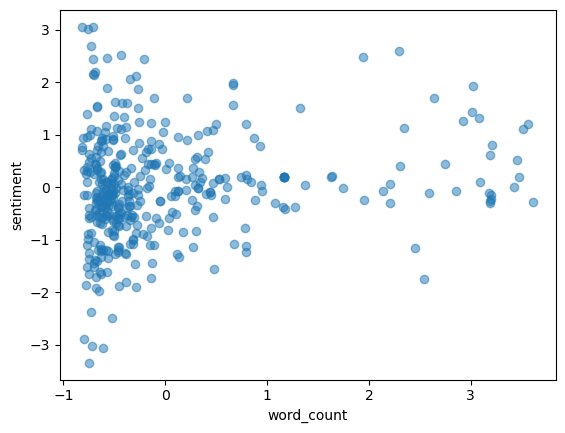

In [44]:
plt.scatter(news_data['word_count'], news_data['sentiment'], alpha=.5)
plt.xlabel('word_count')
plt.ylabel('sentiment')
plt.show()

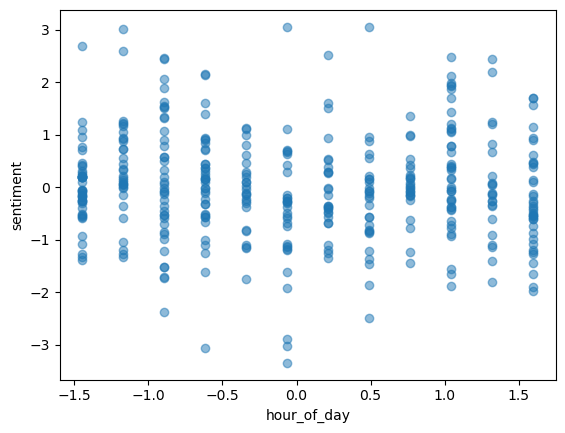

In [48]:
plt.scatter(news_data['month'], news_data['sentiment'], alpha=.5)
plt.xlabel('hour_of_day')
plt.ylabel('sentiment')
plt.show()

In [49]:
# features = ['word_count', 'hour_of_day', 'month', 'Safety Index']
# target = ['sentiment']

# for feature in features:
#     plt.figure(figsize=(8,6))
#     sns.scatterplot(x=news_data[feature], y=news_data[target])
#     plt.xlabel(feature)
#     plt.ylabel(target)
#     plt.show()
    

In [50]:
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

In [51]:
def line_of_best_fit(X, y):
    
    """takes in 2 arrays and gives the vector containing the coefficients for the line of best fit
    
    Args:
        X (array): can be either 1-d or 2-d
        y (array): a 1-d array whcich includes all corresponding response values to X
    
    Returns:
        m (array): coefficents for the line of best fit
    """
    
    X = add_bias_column(X)
    XtXinv = np.linalg.inv(np.matmul(X.T, X))
    m = np.matmul(XtXinv, np.matmul(X.T, y))
    
    
    return m

In [52]:
def linreg_predict(Xnew, ynew, m):
    """ performs linear regression

    Args:
        Xnew (array): all the predictor features
        ynew (array): correspondinh response values to Xnew
        m (array): coefficients for the line of best fit function

    Returns:
        values_dict(dict): contains ypreds, residuals, mean square error and r2 score

    """
    values_dict = {}
    
    # ypreds
    ypred = np.dot(add_bias_column(Xnew), m)
    values_dict['ypreds'] = ypred
    
    
    # residuals
    resids = ynew - ypred
    values_dict['resids'] = resids
    
    # mean square error
    mse = (resids**2).mean()
    values_dict['mse'] = mse
    
    # r2
    r2 = r2_score(ynew, ypred)
    values_dict['r2'] = r2
    
    return values_dict

In [53]:
def get_mse(y_true, y_pred):
    """ gets the MSE

    Args:
        y_true (array): the true y values
        y_pred (array): the predicted y values

    Returns:
        the mean squared error

    """
    
    return np.mean((y_true - y_pred) ** 2)

In [54]:
x = news_data[['word_count', 'hour_of_day', 'month', 'Safety Index']].values
y = np.array(news_data['sentiment'])

m = line_of_best_fit(x, y)
data = linreg_predict(x, y, m)
data

{'ypreds': array([-4.26361640e-02, -2.72981185e-03, -1.42801806e-01, -1.22606428e-01,
        -1.51627935e-01, -1.42199911e-01, -1.28756247e-01, -9.68431012e-02,
        -1.37317032e-01,  3.34170013e-02, -9.90088953e-02, -1.57875358e-01,
        -2.16875563e-01, -2.66511755e-02,  5.41144087e-03, -4.47557318e-02,
        -2.61871599e-02, -4.81893988e-02, -6.67392277e-02, -2.57383737e-02,
        -7.31718296e-02,  4.43861617e-02, -9.01610158e-02,  4.42670252e-02,
        -1.54422714e-02, -6.07966213e-02, -1.02533736e-01, -7.56100789e-02,
        -5.98685900e-02,  1.58758816e-02, -6.67874642e-02, -4.96058859e-02,
         7.90918418e-02,  1.52927535e-01, -9.44915647e-02, -1.36693263e-01,
        -1.53157861e-01, -5.82476146e-02, -5.29964212e-02, -8.92273498e-03,
         1.72599360e-02, -6.99299329e-02, -5.93086599e-02, -1.31862426e-01,
        -1.35602311e-01, -1.60755909e-02, -5.19811623e-03, -5.78127060e-02,
        -1.45578078e-01,  1.09467278e-02,  4.36721572e-02,  4.11649975e-02,
  

In [38]:
crossval = train_test_split(x, y, random_state=42)

Xtrain, Xtest, ytrain, ytest = crossval

m = line_of_best_fit(Xtrain, ytrain)


data = linreg_predict(x, y, m)
res = data['resids']

In [40]:
data

{'ypreds': array([-1.06404442e-01, -2.00505177e-02, -2.17327997e-01, -2.03970181e-01,
        -2.23165858e-01, -2.12619405e-01, -1.15851004e-01, -1.33397104e-01,
        -1.36426536e-01, -4.29153397e-02, -1.21871326e-01, -2.01307488e-01,
        -2.98822797e-01, -3.02077885e-02, -2.41074576e-02, -4.64931542e-02,
        -3.63733101e-02, -4.01433210e-02, -5.24127224e-02, -3.60764698e-02,
        -5.66674341e-02,  8.36886781e-02,  2.05849658e-02,  7.06650074e-02,
         3.99533622e-02,  2.72100148e-02, -3.96138352e-04,  1.31014784e-02,
         1.48789716e-02,  4.98717638e-02,  1.46265341e-02, -4.02593850e-02,
         2.54477647e-02,  9.58641199e-02, -9.33269136e-02, -2.16076189e-01,
        -2.15543406e-01, -8.43213489e-02, -1.10868058e-01, -1.67749127e-01,
        -2.92153855e-02, -3.94163236e-02, -3.23911019e-02, -8.03802928e-02,
        -8.28539625e-02, -3.79548084e-03, -4.19078461e-02, -3.14016340e-02,
        -8.45151400e-02,  8.96225501e-02,  7.45820250e-02,  1.09609801e-01,
  